<a href="https://colab.research.google.com/github/vishalkumarsingh999/9/blob/main/MNIST_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

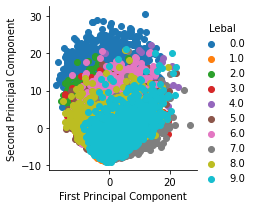

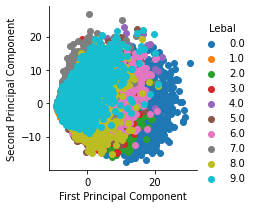

In [5]:
# -*- coding: utf-8 -*-
"""
Created on Tue Sep 14 10:39:46 2021

@author: Vishal Kumar Singh
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data= pd.read_csv("/content/sample_data/mnist_train_small.csv")
y=data.iloc[:,[0]]
x=data.iloc[:,1:]

from sklearn.preprocessing import StandardScaler
std_x=StandardScaler().fit_transform(x)
covariance_matrix=np.matmul(std_x.T,std_x)

from scipy.linalg import eigh
values,vector=eigh(covariance_matrix,eigvals=(782,783))

x_pca=np.matmul(vector.T,std_x.T)

new_data=np.vstack((x_pca,y.T)).T

new_df=pd.DataFrame(new_data,columns=("First Principal Component","Second Principal Component","Lebal"))

import seaborn as sns

sns.FacetGrid(new_df,hue="Lebal").map(plt.scatter,"First Principal Component","Second Principal Component").add_legend()
plt.show()

#Applying PCA using sklearn Libary

from sklearn.decomposition import  PCA

pca=PCA(n_components=2)
x_pca=pca.fit_transform(std_x)
aa=np.hstack((x_pca,y))
x_df=pd.DataFrame(aa,columns=("First Principal Component","Second Principal Component","Lebal"))

sns.FacetGrid(x_df,hue="Lebal").map(plt.scatter,"First Principal Component","Second Principal Component").add_legend()
plt.show()



In [8]:

from sklearn.decomposition import  PCA

pca=PCA(n_components=3)
x_pca=pca.fit_transform(std_x)
aa=np.hstack((x_pca,y))
x_df=pd.DataFrame(aa,columns=("First Principal Component","Second Principal Component","Third Principal Component","Lebal"))

#sns.FacetGrid(x_df,hue="Lebal").map(plt.scatter,"First Principal Component","Second Principal Component").add_legend()
plt.show()

import plotly.express as px

fig=px.scatter_3d(x_df,x="First Principal Component",y="Second Principal Component",z="Third Principal Component",color="Lebal",symbol="Lebal",opacity=0.75)
fig.show()